In [9]:
%matplotlib inline
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import glob
import sys
import pickle

In [10]:
# 0 eid
# 1 rid
# 2 qtot
# 3 qdom
# 4 prim_en
# 5 prim_time
# 6 prim_table_time
# 7 prim_table_charge
# 8 prim_pos
# 9 prim_dir
# 10 tau_en
# 11 tau_time
# 12 tau_table_time
# 13 tau_table_charge
# 14 tau_len
# 15 tau_pos
# 16 tau_dir
# 17 om.string
# 18 om.om
# 19 om_pos
# 20 start_time
# 21 wf_vect
# 22 wf_binwidth
c =0.299792458
n =1.3195
v=c/n 
print v

0.227201559682


In [14]:
e1 = pickle.load(open("DoublePulseWaveformElectron1PeV.pkl", "rb"))
e100 = pickle.load(open("DoublePulseWaveformElectron100TeV.pkl", "rb"))
t1 = pickle.load(open("DoublePulseWaveformTau1PeV.pkl", "rb"))
t100 = pickle.load(open("DoublePulseWaveformTau100TeV.pkl", "rb"))
d3 = pickle.load(open("DoublePulseWaveformDoubleBangs.pkl", "rb"))

In [15]:
print len(e1), len(e1[0]),len(e1[0][0]),len(e1[0][0][21]) 
print len(e100), len(e100[0]),len(e100[0][0]),len(e100[0][0][21]) 
print len(t1), len(t1[0]),len(t1[0][0]),len(t1[0][0][21]) 
print len(t100), len(t100[1]),len(t100[1][0]),len(t100[1][0][21]) 
print len(d3), len(d3[1]),len(d3[1][0]),len(d3[1][0][21]) 

#print t1

198 53 23 128
199 18 23 128
156 14 23 128
179 521 23 128
3 756 23 128


In [16]:
e1 = [i for i in e1 if len(i)>0]
e100 = [i for i in e100 if len(i)>0]
t1 = [i for i in t1 if len(i)>0]
t100 = [i for i in t100 if len(i)>0]
d3 = [i for i in d3 if len(i)>0]

In [17]:
print len(e1), len(e1[0]),len(e1[0][0]),len(e1[0][0][21]) 
print len(e100), len(e100[0]),len(e100[0][0]),len(e100[0][0][21]) 
print len(t1), len(t1[0]),len(t1[0][0]),len(t1[0][0][21]) 
print len(t100), len(t100[1]),len(t100[1][0]),len(t100[1][0][21]) 
print len(d3), len(d3[1]),len(d3[1][0]),len(d3[1][0][21]) 

#print t1

198 53 23 128
199 18 23 128
153 14 23 128
178 521 23 128
3 756 23 128


In [18]:
def sort_by_charge(data, N=30):
    new_data = []
    temp = []
    for i in data:
        temp = sorted(i, key=lambda x: x[3], reverse=True)[:30]
        new_data.append(temp)
    return new_data    

In [19]:
sort_e1 = sort_by_charge(e1)
sort_e100 = sort_by_charge(e100)
sort_t1 = sort_by_charge(t1)
sort_t100 = sort_by_charge(t100)
sort_d3 = sort_by_charge(d3)

In [21]:
print len(sort_e1), len(sort_e1[0]),len(sort_e1[0][0]),len(sort_e1[0][0][21]) 
print len(sort_e100), len(sort_e100[0]),len(sort_e100[0][0]),len(sort_e100[0][0][21]) 
print len(sort_t1), len(sort_t1[0]),len(sort_t1[0][0]),len(sort_t1[0][0][21]) 
print len(sort_t100), len(sort_t100[1]),len(sort_t100[1][0]),len(sort_t100[1][0][21]) 
print len(sort_d3), len(sort_d3[1]),len(sort_d3[1][0]),len(sort_d3[1][0][21]) 


 198 30 23 128
199 18 23 128
153 14 23 128
178 30 23 128
3 30 23 128


In [22]:
def bang_time_shifts(one, one_dir, length, dom):
    if length > 0:
        l_x = np.sin(one_dir[0])*np.cos(one_dir[1])*length
        l_y = np.sin(one_dir[0])*np.sin(one_dir[1])*length
        l_z = np.cos(one_dir[0])*length
    two = [0,0,0]
    two[0] = one[0]-l_x 
    two[1] = one[1]-l_y 
    two[2] = one[2]-l_z 
    x_2 = (dom[0]-two[0])**2
    y_2 = (dom[1]-two[1])**2
    z_2 = (dom[2]-two[2])**2
    x_1 = (one[0]-dom[0])**2
    y_1 = (one[1]-dom[1])**2
    z_1 = (one[2]-dom[2])**2
    return ((x_1+y_1+z_1)**0.5)/v,((x_2+y_2+z_2)**0.5)/v
    #return two#one, l_z,l_y, l_z

In [23]:
def bang_time_shifts_2(one, two, dom):
    x_2 = (dom[0]-two[0])**2
    y_2 = (dom[1]-two[1])**2
    z_2 = (dom[2]-two[2])**2
    x_1 = (one[0]-dom[0])**2
    y_1 = (one[1]-dom[1])**2
    z_1 = (one[2]-dom[2])**2
    x = (one[0]-two[0])**2
    y = (one[1]-two[1])**2
    z = (one[2]-two[2])**2
    return ((x_1+y_1+z_1)**0.5)/v,((x_2+y_2+z_2)**0.5)/v 
    #return two

In [24]:
for i in sort_t1[0:1]:
    for j in i:
        #print j[5:16]
        print bang_time_shifts(j[8],j[16],j[14],j[19])
        print bang_time_shifts_2(j[8],j[15],j[19])

(710.5633963731977, 744.17152896724917)
(710.5633963731977, 744.1715289672492)
(827.5378033422055, 815.51501956361528)
(827.5378033422055, 815.515019563615)
(783.340652620193, 785.33442552018141)
(783.340652620193, 785.3344255201813)
(744.0763946844077, 761.3533704531053)
(744.0763946844077, 761.3533704531053)
(683.6478902682042, 734.26630919203137)
(683.6478902682042, 734.2663091920314)
(775.3147842341867, 762.79039086473858)
(775.3147842341867, 762.7903908647385)
(664.1324693428403, 731.93319606082491)
(664.1324693428403, 731.9331960608249)
(725.5098164076492, 743.54825118999111)
(725.5098164076492, 743.5482511899911)
(747.0790175013541, 749.49641414789176)
(747.0790175013541, 749.4964141478918)
(848.9731267551209, 809.77045716393457)
(848.9731267551209, 809.7704571639345)
(892.979093668741, 842.31991213925664)
(892.979093668741, 842.3199121392565)
(940.8992464501234, 880.05733559863404)
(940.8992464501234, 880.0573355986338)
(711.2078862012316, 745.12500517737783)
(711.2078862012316

In [36]:
def PlotWave(data,name,N=1):
    xs = np.array([i for i in range(128)])
    for i in data[0:N]:
        fig = plt.figure(figsize=(20,20))
        fig.subplots_adjust(hspace = .5, wspace=.1)
        for j in i:
            wf = j[21]  
            w_bw = j[22]
            max_wf = 1.3*max(wf)
            Xs = xs*w_bw           
            qtot = j[2]    
            qdom = j[3]    
            energy = j[10]    
            string = j[17]    
            om = j[18]
            print j[6],j[12]
            shift1,shift2 = bang_time_shifts(j[8],j[16],j[14],j[19])
            b1_time = j[5]-j[20]+shift1 
            b2_time = j[11]-j[20]+shift2
            #print j[16], j[5]+shift1, j[9]+shift2, b1_time, b2_time
    
            ax1 = fig.add_subplot(10, 3, i.index(j)+1)
            ax1.axvline(b1_time, color ='r')
            ax1.axvline(b2_time, color ='g')
            ax1.text(Xs[1],max_wf*1.0,"({0},{1}), E{2:2.2e}GeV, Q{3:.1f}PE, q{4:.1f}PE".format(om,string,energy,qtot,qdom), color="k",fontsize = 16 )     
            ax1.set_ylim(0,max_wf*1.2)
            ax1.plot(Xs,wf,'b--', label = "Expected charge")
            
        fig.tight_layout()
        name_0 = name+"_{0}.png".format(data.index(i))
        #plt.savefig(name_0)
        plt.show()
        plt.close('all')

In [26]:
def PlotWaveE(data,name,N=1):
    xs = np.array([i for i in range(128)])
    for i in data[0:N]:
        fig = plt.figure(figsize=(20,20))
        fig.subplots_adjust(hspace = .5, wspace=.1)
        for j in i:
            wf = j[21]  
            w_bw = j[22]
            max_wf = 1.3*max(wf)
            Xs = xs*w_bw    
            
            qtot = j[2]    
            qdom = j[3]    
            energy = j[10]    
            string = j[17]    
            om = j[18]    
            shift1,shift2 = bang_time_shifts_2(j[8],j[15],j[19])
            b1_time = j[5]-j[20]+shift1 
            #print j[16], j[5]+shift1, j[9]+shift2, b1_time, b2_time
    
            ax1 = fig.add_subplot(10, 3, i.index(j)+1)
            ax1.axvline(b1_time, color ='r')
            ax1.text(Xs[1],max_wf*1.0,"({0},{1}), E{2:2.2e}GeV, Q{3:.1f}PE, q{4:.1f}PE".format(om,string,energy,qtot,qdom), color="k",fontsize = 16 )     
            ax1.set_ylim(0,max_wf*1.2)
            ax1.plot(Xs,wf,'b--', label = "Expected charge")
            
        fig.tight_layout()
        name_0 = name+"_{0}.png".format(data.index(i))
        #plt.savefig(name_0)
        plt.show()
        plt.close('all')

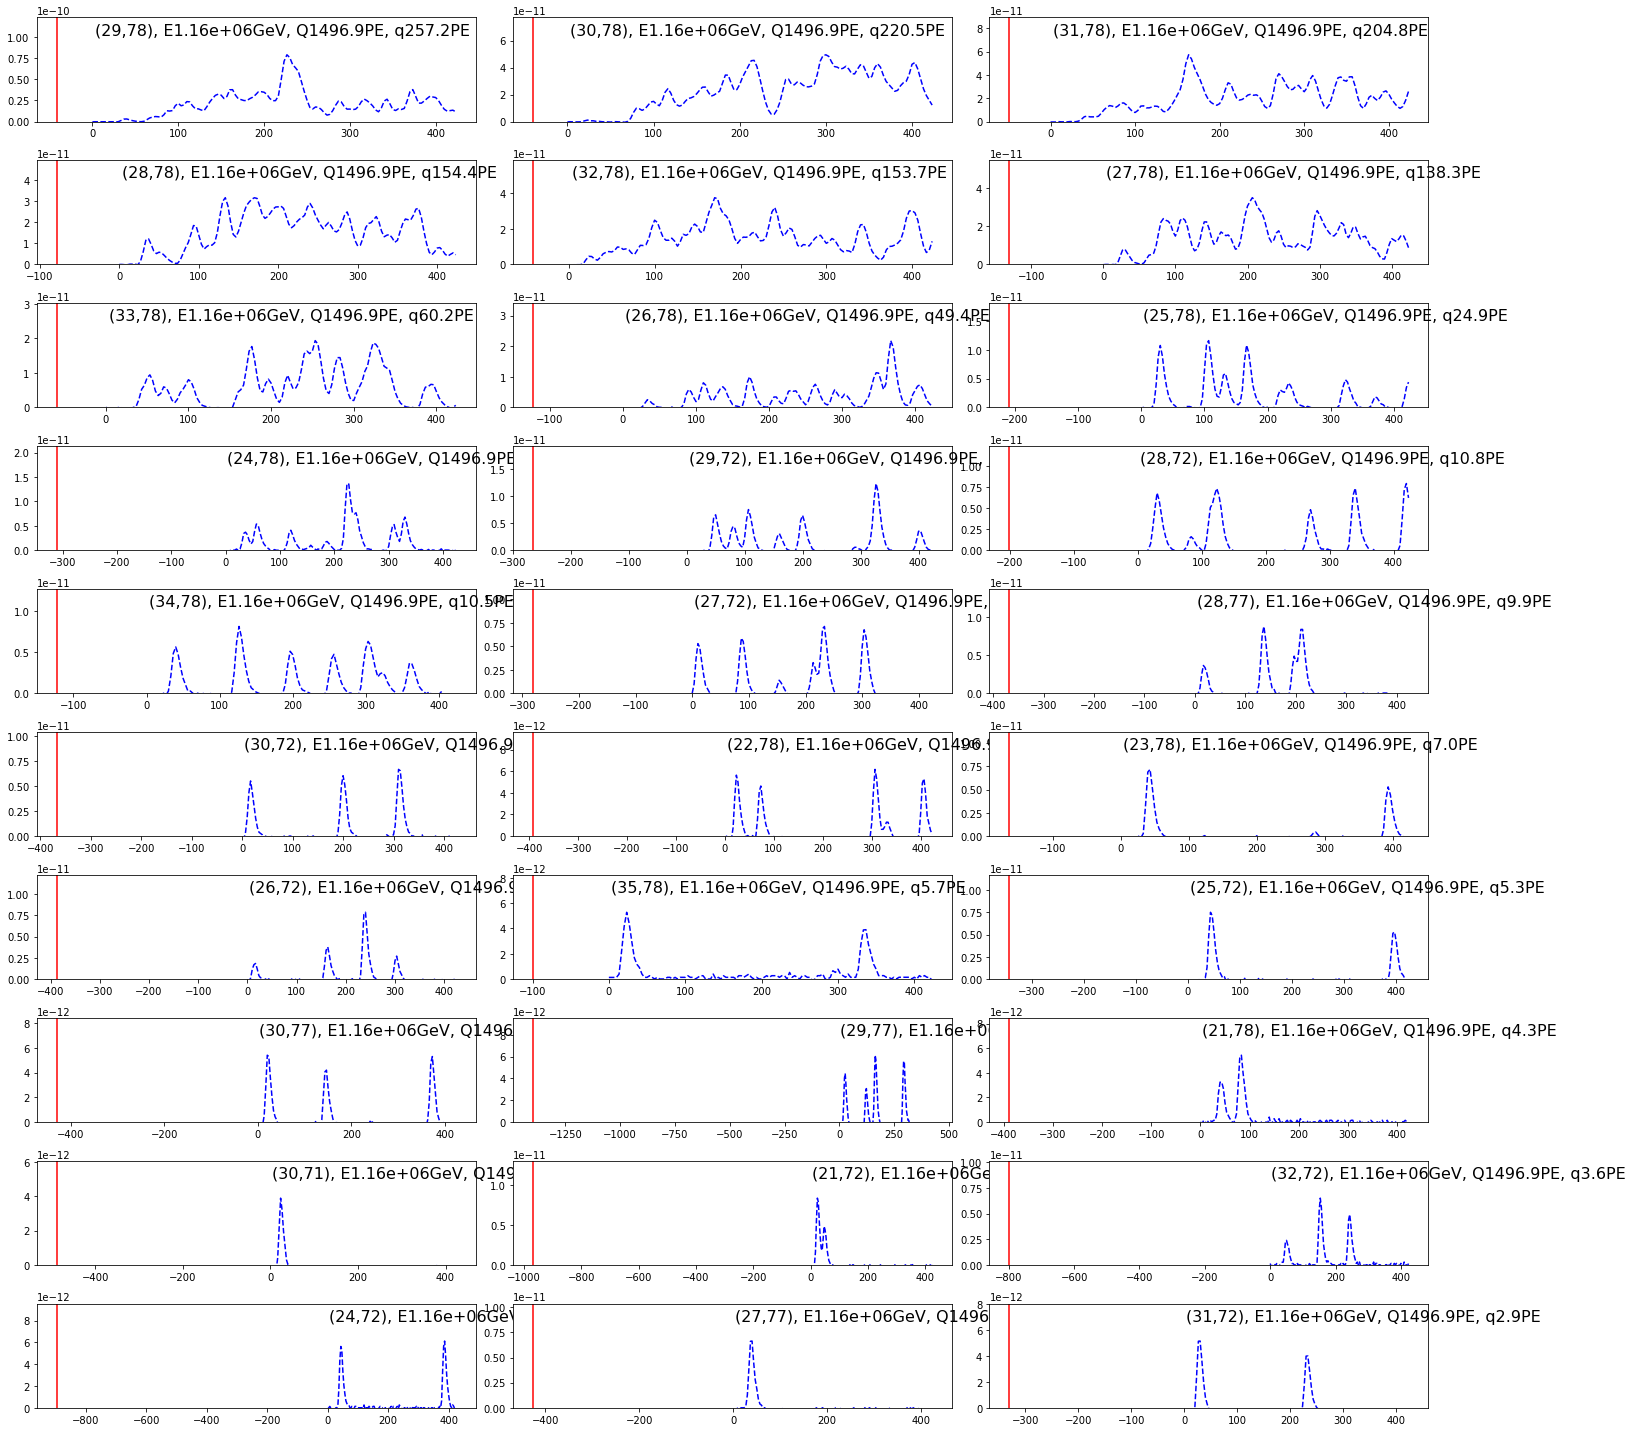

In [27]:
PlotWaveE(sort_e1,"Electron1PeV")

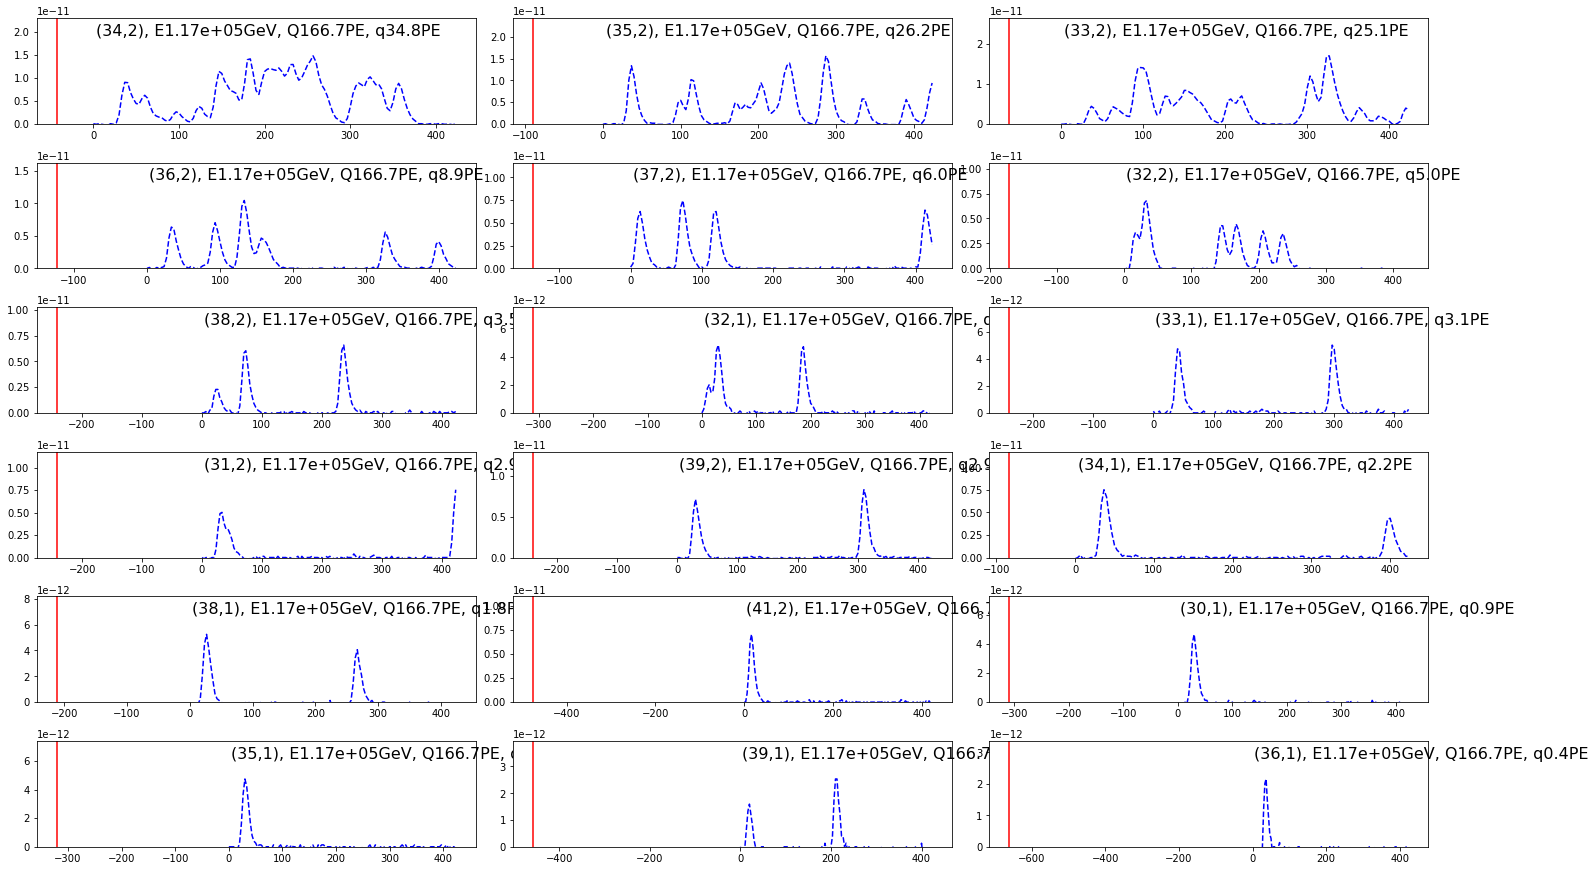

In [28]:
PlotWaveE(sort_e100,"Electron100TeV")

[400.0, 4200.0] [400.0, 4200.0]
[300.0, 4000.0] [300.0, 4000.0]
[400.0, 4100.0] [400.0, 4100.0]
[400.0, 4100.0] [400.0, 4100.0]
[400.0, 4200.0] [400.0, 4200.0]
[400.0, 7100.0] [400.0, 7100.0]
[400.0, 4200.0] [400.0, 4200.0]
[400.0, 4100.0] [400.0, 4100.0]
[400.0, 4100.0] [400.0, 4100.0]
[300.0, 7100.0] [300.0, 7100.0]
[300.0, 7100.0] [300.0, 7100.0]
[200.0, 7100.0] [200.0, 7100.0]
[400.0, 4200.0] [400.0, 4200.0]
[300.0, 7100.0] [300.0, 7100.0]


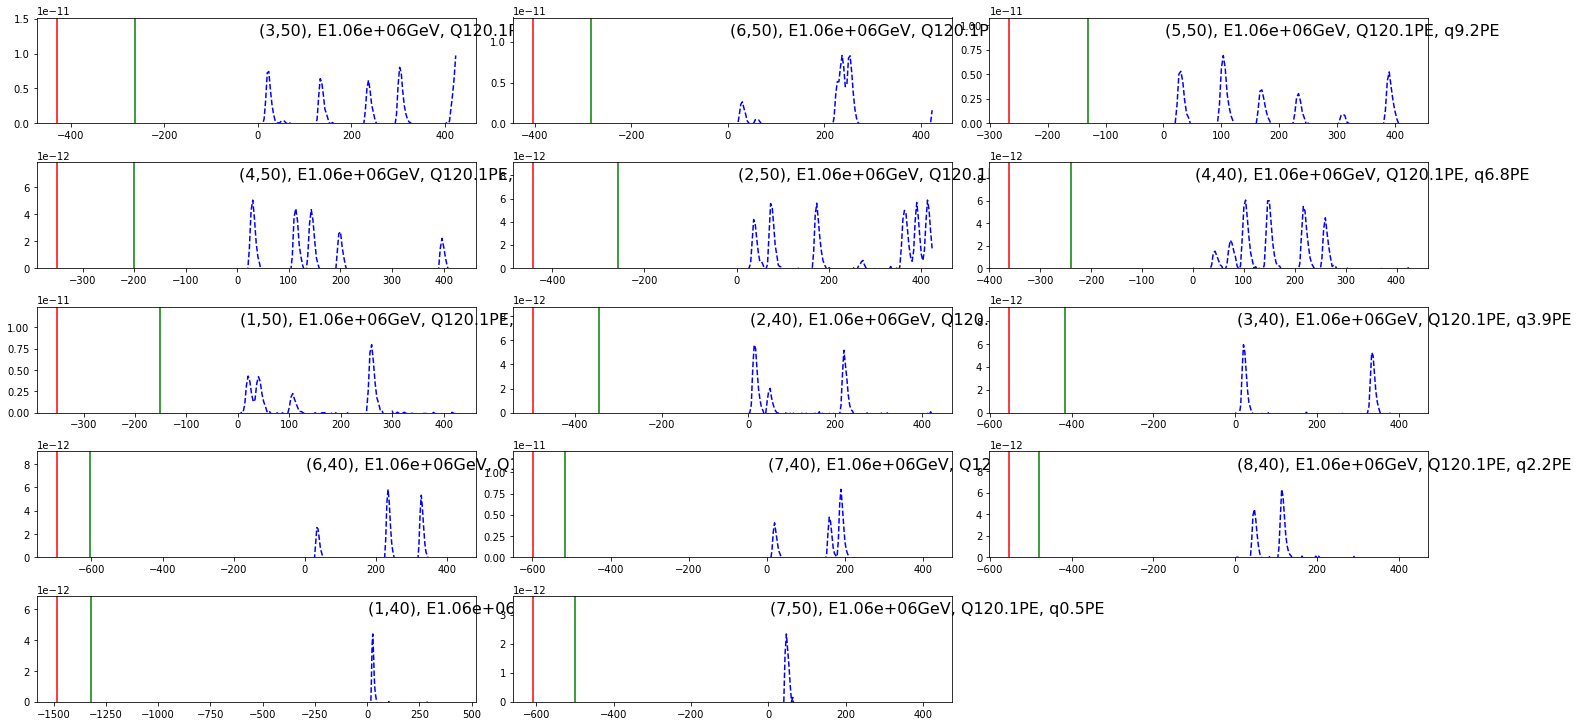

In [37]:
PlotWave(sort_t1,"Tau1PeV")

[100.0, 3200.0] [100.0, 3200.0]
[200.0, 3800.0] [200.0, 3800.0]
[100.0, 3000.0] [100.0, 3000.0]
[100.0, 2900.0] [100.0, 2900.0]
[100.0, 3000.0] [100.0, 3000.0]
[200.0, 3900.0] [200.0, 3900.0]
[200.0, 3600.0] [200.0, 3600.0]
[100.0, 3400.0] [100.0, 3400.0]
[200.0, 3500.0] [200.0, 3500.0]
[100.0, 3200.0] [100.0, 3200.0]
[100.0, 2800.0] [100.0, 2800.0]
[100.0, 3100.0] [100.0, 3100.0]
[200.0, 3800.0] [200.0, 3800.0]
[200.0, 4000.0] [200.0, 4000.0]
[200.0, 3900.0] [200.0, 3900.0]
[100.0, 2800.0] [100.0, 2800.0]
[0.0, 2600.0] [0.0, 2600.0]
[200.0, 3800.0] [200.0, 3800.0]
[300.0, 4100.0] [300.0, 4100.0]
[200.0, 3600.0] [200.0, 3600.0]
[200.0, 3900.0] [200.0, 3900.0]
[100.0, 2900.0] [100.0, 2900.0]
[200.0, 4000.0] [200.0, 4000.0]
[100.0, 2700.0] [100.0, 2700.0]
[300.0, 7100.0] [300.0, 7100.0]
[100.0, 3200.0] [100.0, 3200.0]
[0.0, 2600.0] [0.0, 2600.0]
[100.0, 3000.0] [100.0, 3000.0]
[200.0, 3700.0] [200.0, 3700.0]
[100.0, 2800.0] [100.0, 2800.0]


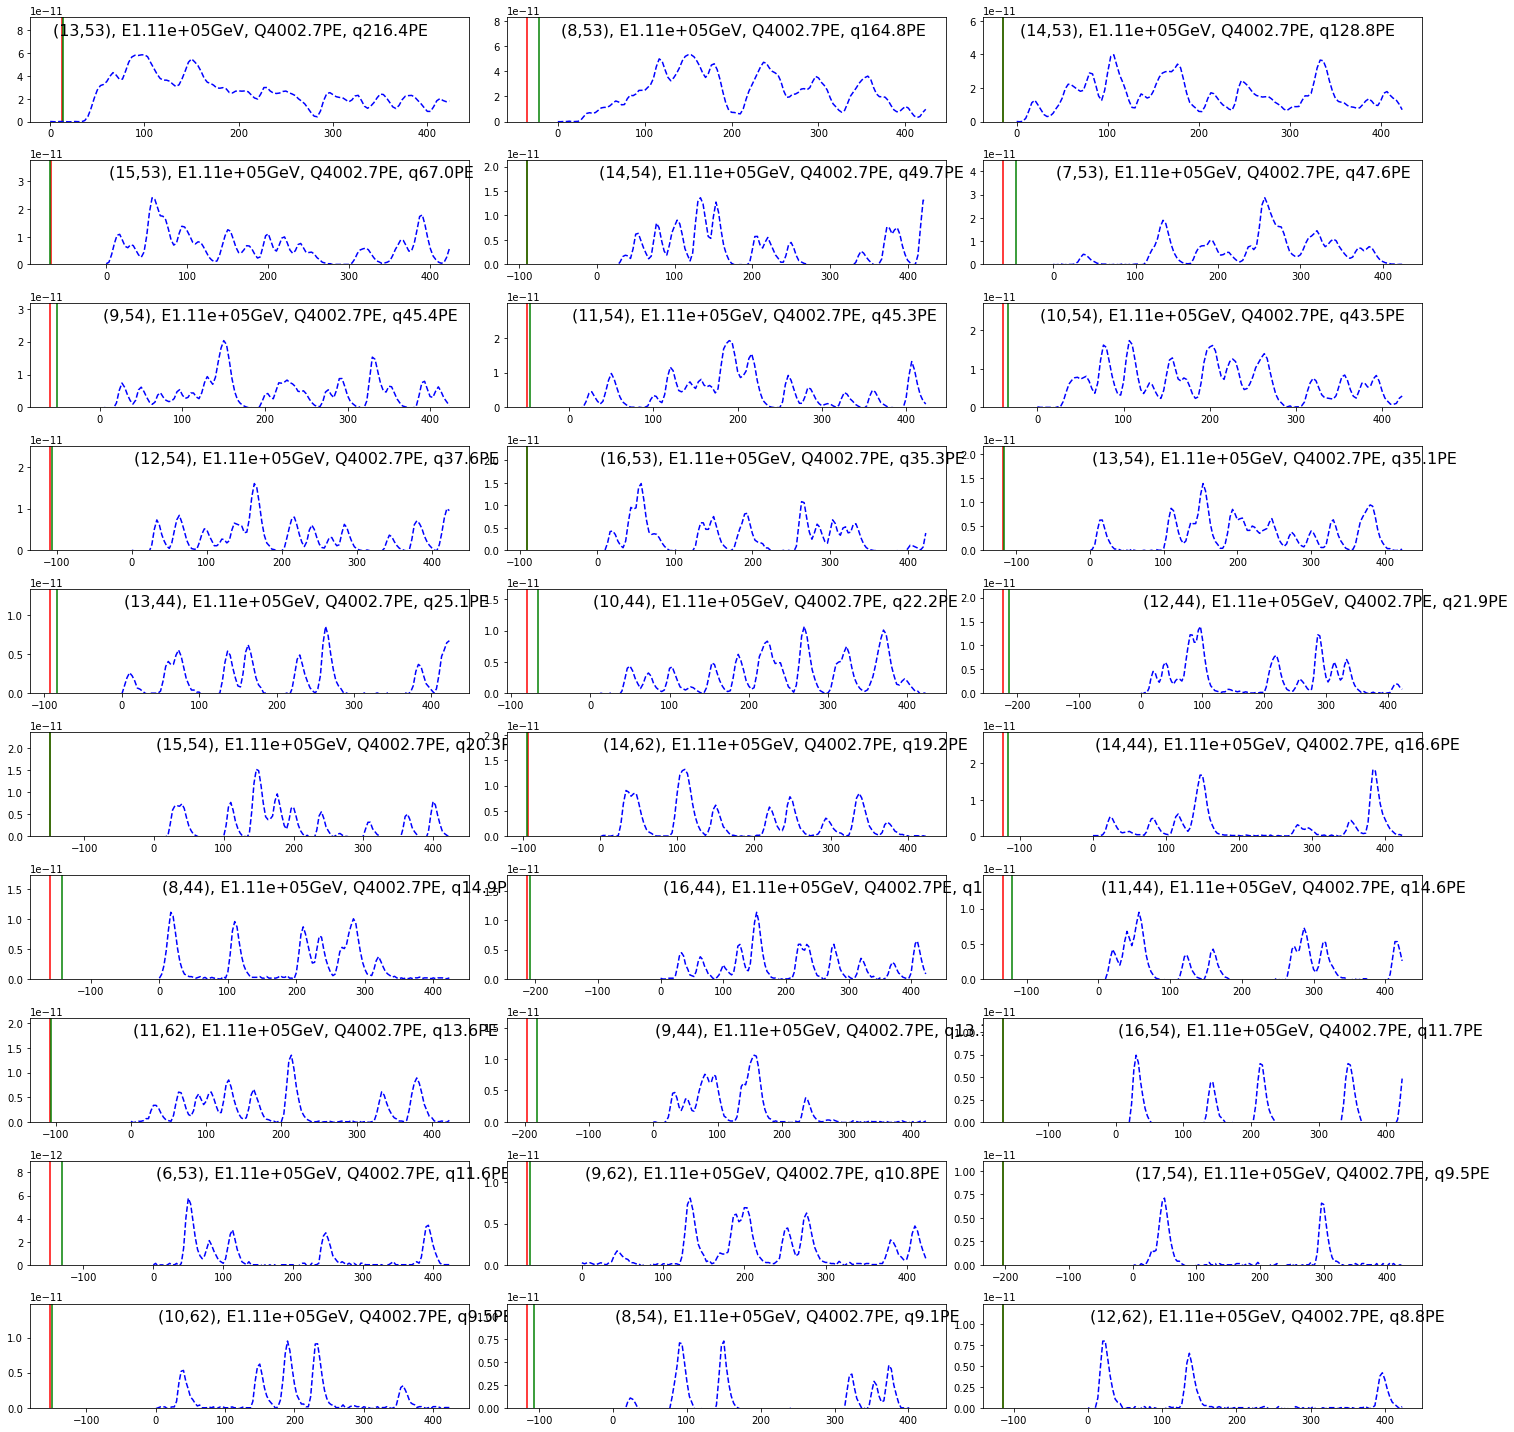

In [38]:
PlotWave(sort_t100,"Tau100TeV")

In [85]:
def PlotWave(data,name,E =1,N=10):
    xs = np.array([i for i in range(128)])
    for k in range(0,100):
        fig = plt.figure(figsize=(20,20))
        fig.subplots_adjust(hspace = .5, wspace=.1)
        for j in range(0,len(data[k])):
            wf = data[k][j][17]  
            rid = data[k][j][0]    
            eid = data[k][j][1]    
            qtot = data[k][j][2]    
            qdom = data[k][j][3]    
            energy = data[k][j][8]    
            string = data[k][j][13]    
            om = data[k][j][14]    
            w_bw = data[k][j][18]
            length 
            max_wf = 1.3*max(wf)
            Xs = xs*w_bw    
            ax1 = fig.add_subplot(10, 3, j+1)
            ax1.text(Xs[1],max_wf*1.0,"({0},{1}), E{2:2.2e}GeV, Q{3:.1f}PE, q{4:.1f}PE".format(om,string,energy,qtot,qdom), color="k",fontsize = 16 )     
            #ax1.set_title("ATWD response", fontsize = 14)
            #ax1.set_xlabel("Time, ns", fontsize = 14)                                                              
            #ax1.set_ylabel("Charge", fontsize = 14)
            ax1.set_ylim(0,max_wf*1.2)
            ax1.plot(Xs,wf,'b--', label = "Expected charge")
            
        fig.tight_layout()
        name_0 = name+"_{0}.png".format(k)
        #print name_0
        plt.savefig(name_0)
        #plt.show()
        plt.close('all')